# Imports and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set visual style
sns.set_theme(style="whitegrid")

# Define paths
INPUT_PATH = r"D:\Projects for PORT\data for practice\big data\dataset1.csv"
OUTPUT_PATH = "cleaned_dataset.csv"
FIGURES_DIR = "figures"

# Create folder for saving plots
if not os.path.exists(FIGURES_DIR):
    os.makedirs(FIGURES_DIR)

print("Setup complete. Libraries loaded.")

Setup complete. Libraries loaded.


# Data Loading & Initial EDA

In [2]:
# Load the dataset
df = pd.read_csv(INPUT_PATH)

print(f"Dataset Shape: {df.shape}")
print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- First 5 Rows ---")
display(df.head())

# Drop duplicates
initial_count = len(df)
df = df.drop_duplicates()
print(f"\nRemoved {initial_count - len(df)} duplicate rows.")

Dataset Shape: (917131, 5)

--- Missing Values ---
Name                      0
Short description     51027
Gender               100368
Occupation           155387
Age of death              1
dtype: int64

--- First 5 Rows ---


,Name,Short description,Gender,Occupation,Age of death
0,Vilém Pospíšil,Baptist minister,Male,Pastor,73.0
1,Elise Schmieden,schrijfster (1841-1896),NaN,Artist,55.0
2,Jerónimo de Rueda,Spanish baroque painter,Male,Artist,80.0
3,August Karl Wilhelm Weissenbruch,German author,Male,Artist,82.0
4,Gösta Göthlin,schwedischer Arzt und Bakteriologe,Male,Physician,89.0



Removed 39 duplicate rows.


# Data Cleaning (Gender & Age of Death)

In [3]:
# 1. Gender: Fill missing with "Unknown"
df['Gender'] = df['Gender'].fillna('Unknown')

# 2. Age of death: Fill missing with median and convert to integer
median_age = df['Age of death'].median()
df['Age of death'] = df['Age of death'].fillna(median_age).astype(int)

print("Gender and Age cleaning complete.")
print(f"Median age used for imputation: {median_age}")

Gender and Age cleaning complete.
Median age used for imputation: 72.0


# Defining Occupation Mapping Logic

In [4]:
def map_occupation(row):
    # Convert to lowercase for matching, handle NaNs
    occ = str(row['Occupation']).lower() if pd.notnull(row['Occupation']) else ""
    desc = str(row['Short description']).lower() if pd.notnull(row['Short description']) else ""
    
    # Dictionary for mapping keywords to categories
    categories = {
        'Artists': ['artist', 'painter', 'sculptor', 'actor', 'director', 'film', 'theatre', 'architect', 'photographer'],
        'Writers': ['writer', 'author', 'poet', 'journalist', 'novelist', 'literature', 'editor', 'schrijfster'],
        'Scientists': ['scientist', 'researcher', 'chemist', 'physicist', 'biologist', 'philosopher', 'professor', 'scholar', 'geologist'],
        'Physicians': ['physician', 'doctor', 'surgeon', 'medic', 'nurse', 'dentist', 'arzt'],
        'Religious Leaders': ['religious', 'priest', 'monk', 'pastor', 'bishop', 'cleric', 'theologian', 'pope', 'minister'],
        'Politicians': ['politician', 'judge', 'jurist', 'lawyer', 'diplomat', 'official', 'statesman', 'senator'],
        'Musicians': ['musician', 'composer', 'singer', 'pianist', 'violinist', 'conductor', 'opera'],
        'Engineers': ['engineer', 'inventor', 'technician', 'mechanic', 'software'],
        'Athletes': ['athlete', 'football', 'soccer', 'baseball', 'basketball', 'tennis', 'olympic', 'player'],
    }
    
    # Combine fields to check
    combined_text = f"{occ} {desc}"
    
    # Iterate through mapping
    for cat, keywords in categories.items():
        if any(kw in combined_text for kw in keywords):
            return cat
            
    return 'Others'

print("Mapping function defined.")

Mapping function defined.


# Applying Occupation Categories & Final Cleaning

In [5]:
print("Processing occupation mapping (this may take a moment for large data)...")
df['Occupation Category'] = df.apply(map_occupation, axis=1)

# Clean Short description: Use Occupation if missing, else 'Not available'
df['Short description'] = df['Short description'].fillna(df['Occupation']).fillna('Not available')

print("Mapping and Short Description cleaning complete.")
print("\nValue Counts for New Categories:")
print(df['Occupation Category'].value_counts())

Processing occupation mapping (this may take a moment for large data)...
Mapping and Short Description cleaning complete.

Value Counts for New Categories:
Occupation Category
Others               278442
Artists              232792
Politicians          160607
Athletes              82025
Scientists            70316
Religious Leaders     35439
Writers               26920
Physicians            14941
Engineers             11281
Musicians              4329
Name: count, dtype: int64


# Statistical Analysis

In [7]:
# 1. Average age of death by gender
# Filter the dataframe to exclude "Unknown" gender for this specific analysis
df_filtered = df[df['Gender'] != 'Unknown']

# 1. Average age of death by gender
avg_age_gender = df_filtered.groupby('Gender')['Age of death'].mean().reset_index()

print("--- Average Age of Death by Gender (Filtered) ---")
print(avg_age_gender)

# 2. Insights: Age difference calculation
# We extract the specific values for Male and Female to compare them
try:
    male_avg = avg_age_gender[avg_age_gender['Gender'] == 'Male']['Age of death'].iloc[0]
    female_avg = avg_age_gender[avg_age_gender['Gender'] == 'Female']['Age of death'].iloc[0]
    
    diff = female_avg - male_avg
    
    print(f"\nInsight:")
    if diff > 0:
        print(f"On average, Females lived {diff:.2f} years longer than Males.")
    else:
        print(f"On average, Males lived {abs(diff):.2f} years longer than Females.")
except IndexError:
    print("\nNote: Could not calculate difference. Ensure both 'Male' and 'Female' exist in the data.")

--- Average Age of Death by Gender (Filtered) ---
   Gender  Age of death
0  Female     71.216894
1    Male     69.189993

Insight:
On average, Females lived 2.03 years longer than Males.


# Visualizations - Age & Missing Values

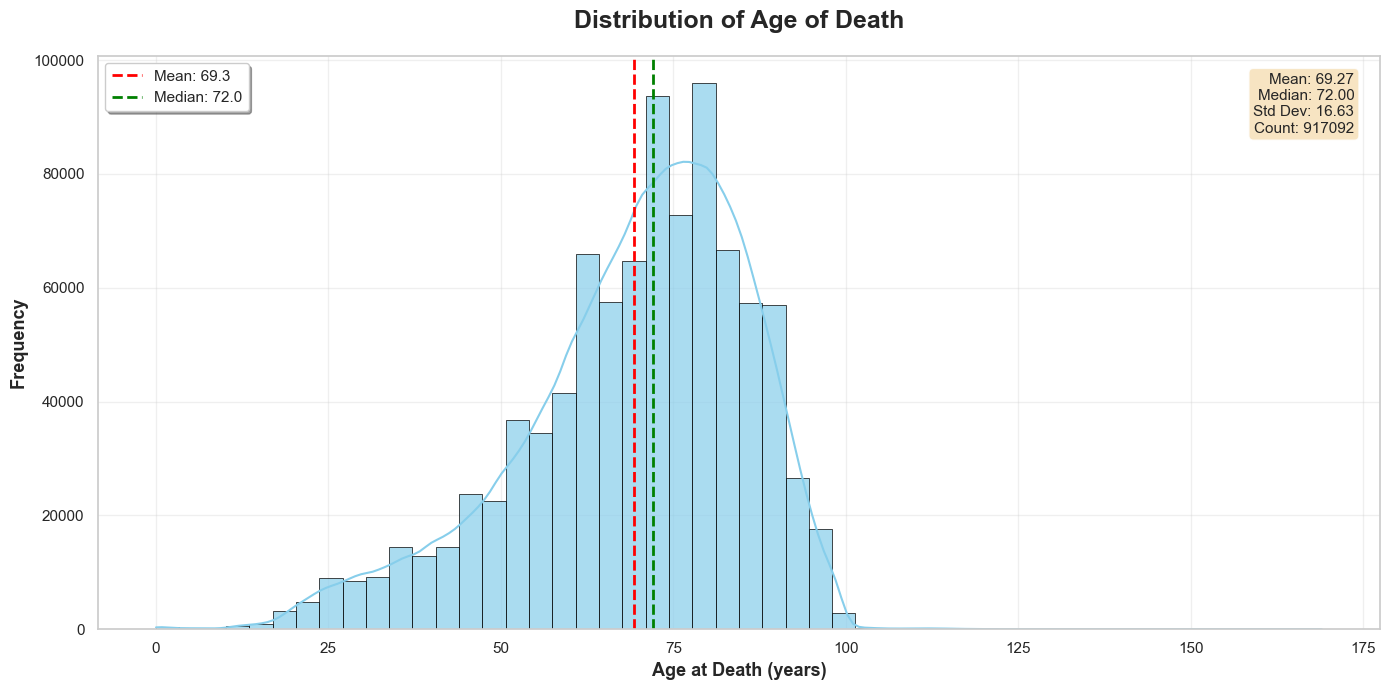

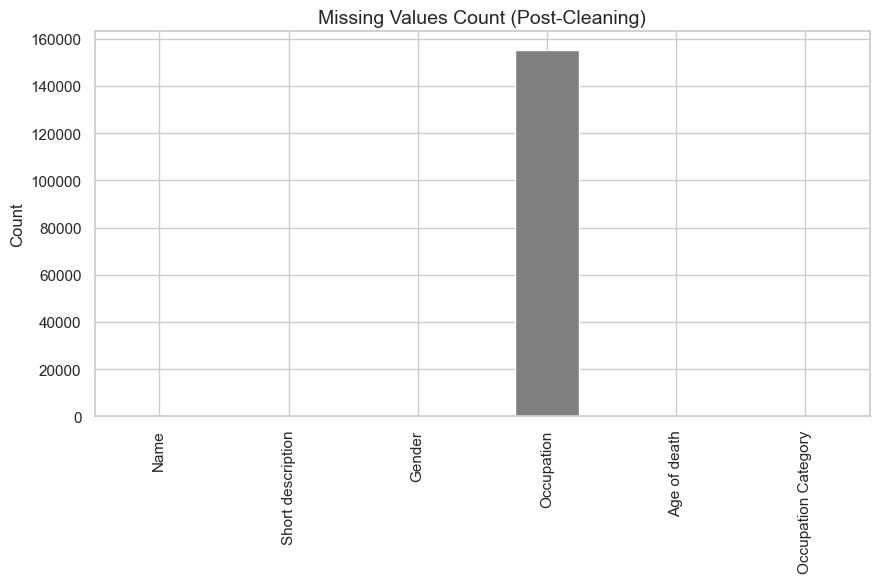

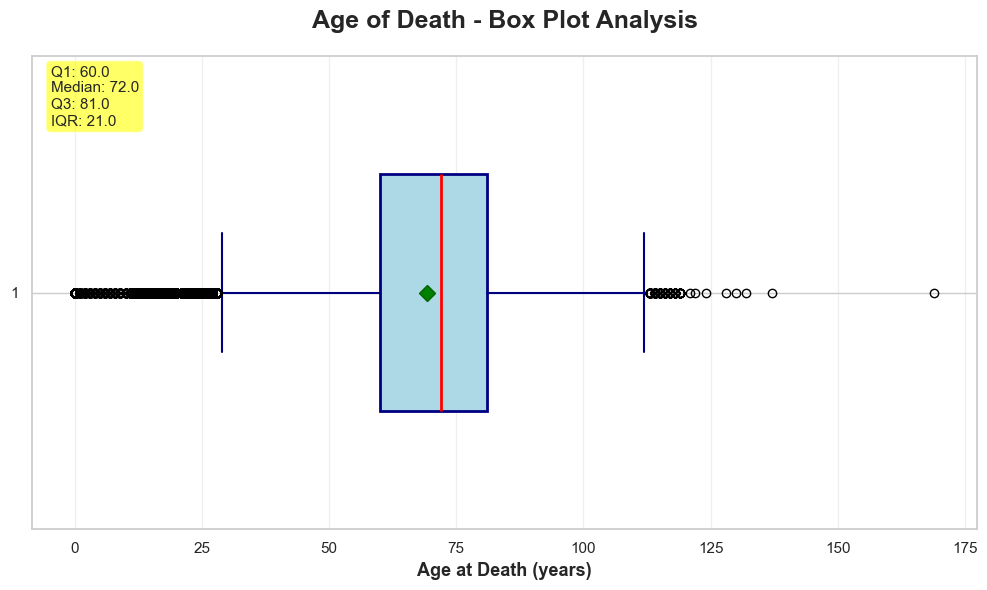

In [11]:
# Set professional style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 10

# 1. Enhanced Age of Death Distribution
fig, ax = plt.subplots(figsize=(14, 7))

# Create histogram with KDE
sns.histplot(df['Age of death'], bins=50, kde=True, color='skyblue', 
             edgecolor='black', linewidth=0.5, alpha=0.7, ax=ax)

# Add statistical annotations
mean_age = df['Age of death'].mean()
median_age = df['Age of death'].median()
std_age = df['Age of death'].std()

# Add vertical lines for mean and median
ax.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.1f}')
ax.axvline(median_age, color='green', linestyle='--', linewidth=2, label=f'Median: {median_age:.1f}')

# Add text box with statistics
stats_text = f'Mean: {mean_age:.2f}\nMedian: {median_age:.2f}\nStd Dev: {std_age:.2f}\nCount: {df["Age of death"].count()}'
ax.text(0.98, 0.97, stats_text, transform=ax.transAxes, 
        fontsize=11, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Enhanced labels and title
ax.set_title('Distribution of Age of Death', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Age at Death (years)', fontsize=13, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=13, fontweight='bold')
ax.legend(loc='upper left', fontsize=11, frameon=True, shadow=True)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f"{FIGURES_DIR}/age_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

# 2. Missing Values Visualization (Post-Cleaning)
plt.figure(figsize=(10, 5))
df.isnull().sum().plot(kind='bar', color='gray')
plt.title('Missing Values Count (Post-Cleaning)', fontsize=14)
plt.ylabel('Count')
plt.savefig(f"{FIGURES_DIR}/missing_values.png")
plt.show()

# 3. BONUS: Age Distribution Box Plot with Outlier Detection
fig, ax = plt.subplots(figsize=(10, 6))

# Create box plot
box_parts = ax.boxplot(df['Age of death'].dropna(), vert=False, patch_artist=True,
                        widths=0.5, showmeans=True,
                        boxprops=dict(facecolor='lightblue', color='navy', linewidth=2),
                        whiskerprops=dict(color='navy', linewidth=1.5),
                        capprops=dict(color='navy', linewidth=1.5),
                        medianprops=dict(color='red', linewidth=2),
                        meanprops=dict(marker='D', markerfacecolor='green', 
                                      markeredgecolor='darkgreen', markersize=8))

# Add annotations
q1, median, q3 = np.percentile(df['Age of death'].dropna(), [25, 50, 75])
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

stats_box = f'Q1: {q1:.1f}\nMedian: {median:.1f}\nQ3: {q3:.1f}\nIQR: {iqr:.1f}'
ax.text(0.02, 0.98, stats_box, transform=ax.transAxes, 
        fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.6))

ax.set_xlabel('Age at Death (years)', fontsize=13, fontweight='bold')
ax.set_title('Age of Death - Box Plot Analysis', fontsize=18, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig(f"{FIGURES_DIR}/age_boxplot.png", dpi=300, bbox_inches='tight')
plt.show()

# Gender Distribution

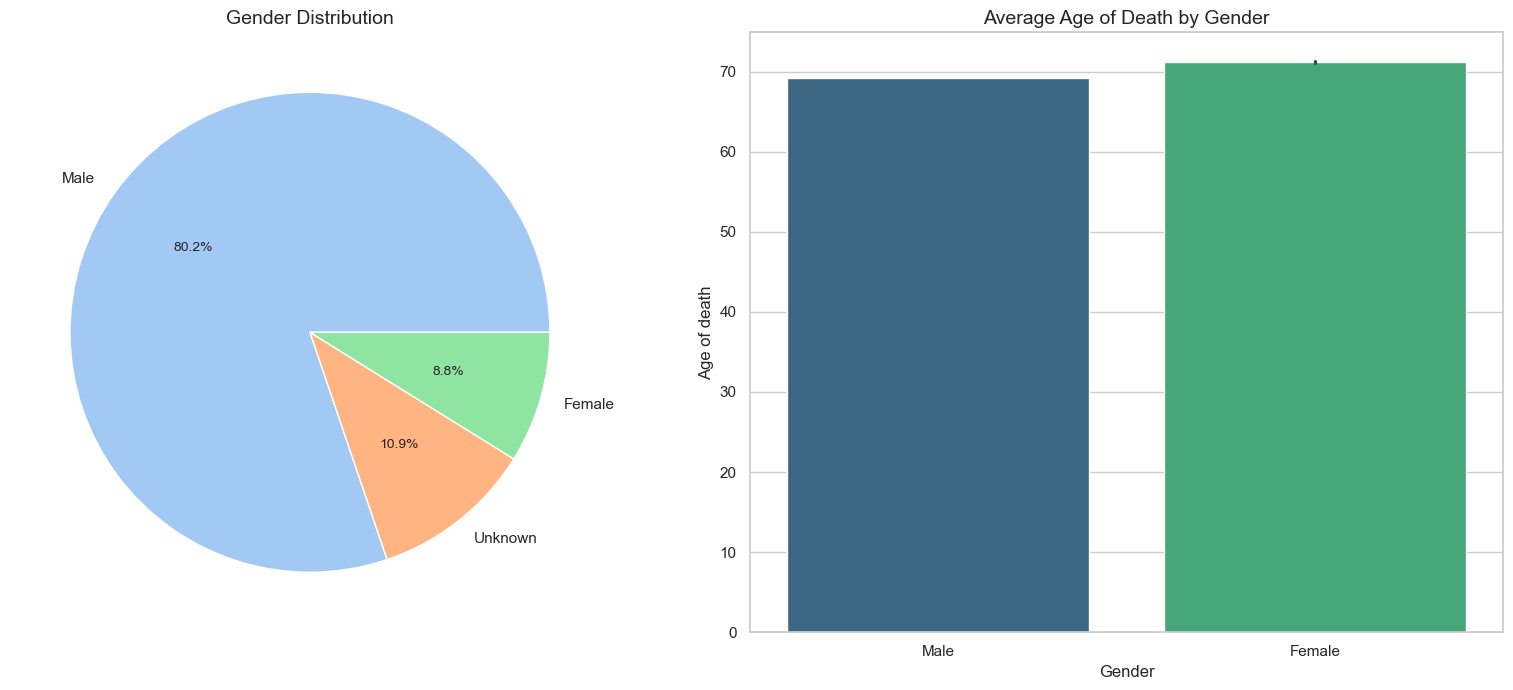

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# 1. Pie Chart
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[0], colors=sns.color_palette("pastel"))
ax[0].set_title('Gender Distribution', fontsize=14)
ax[0].set_ylabel('')

# 2. Bar Chart: Avg Age by Gender (Fixed the warning here)
# We use the df_filtered from Cell 6 to keep "Unknown" out of the chart if desired
df_plot = df[df['Gender'] != 'Unknown'] 

sns.barplot(
    x='Gender', 
    y='Age of death', 
    data=df_plot, 
    ax=ax[1], 
    palette='viridis', 
    hue='Gender', 
    legend=False
)
ax[1].set_title('Average Age of Death by Gender', fontsize=14)

plt.tight_layout()
plt.savefig(f"{FIGURES_DIR}/gender_analysis.png")
plt.show()

# Occupation Analysis

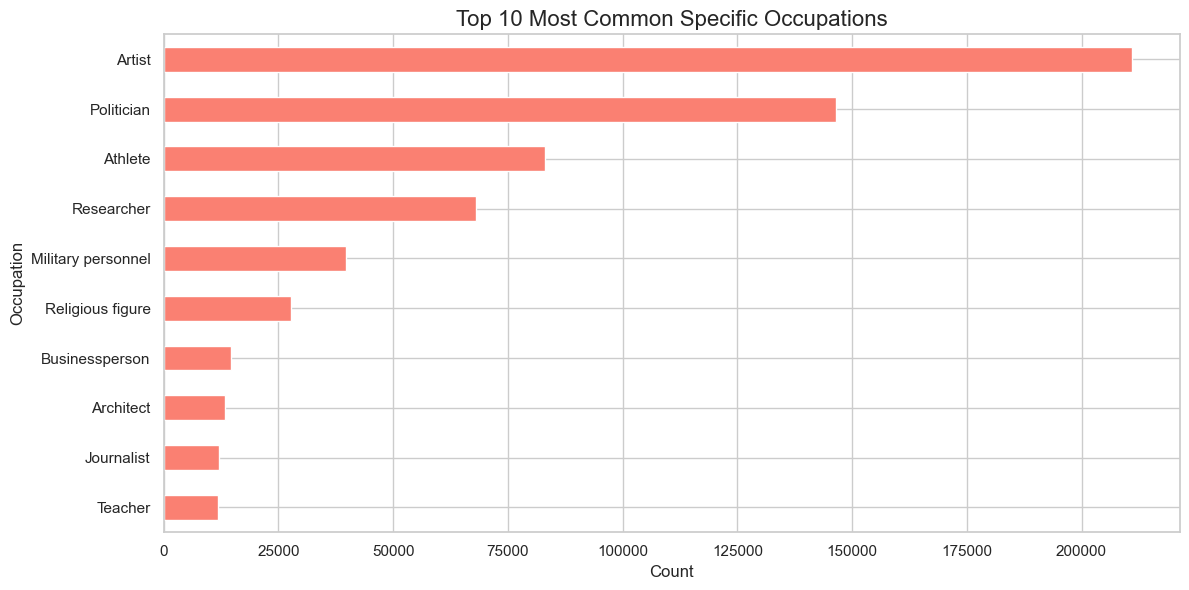

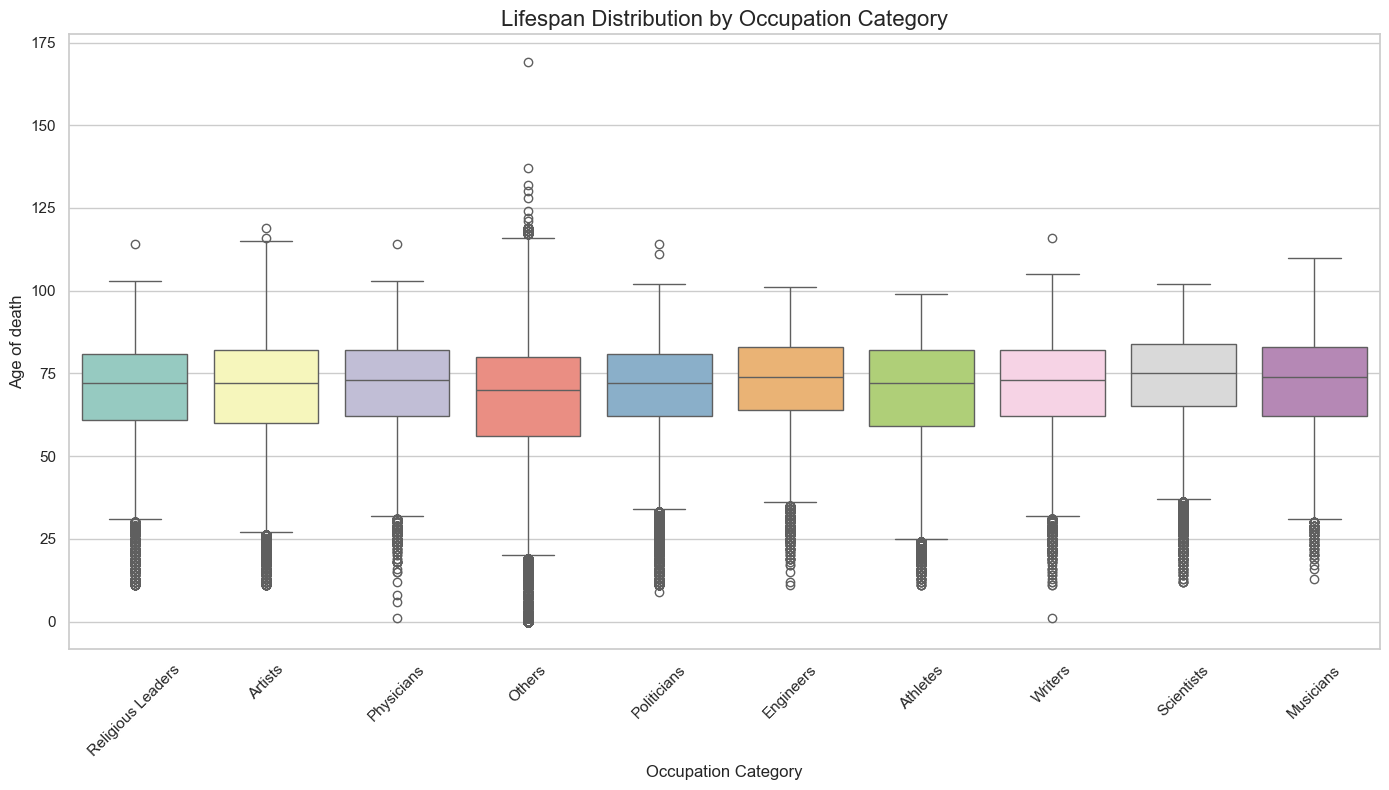

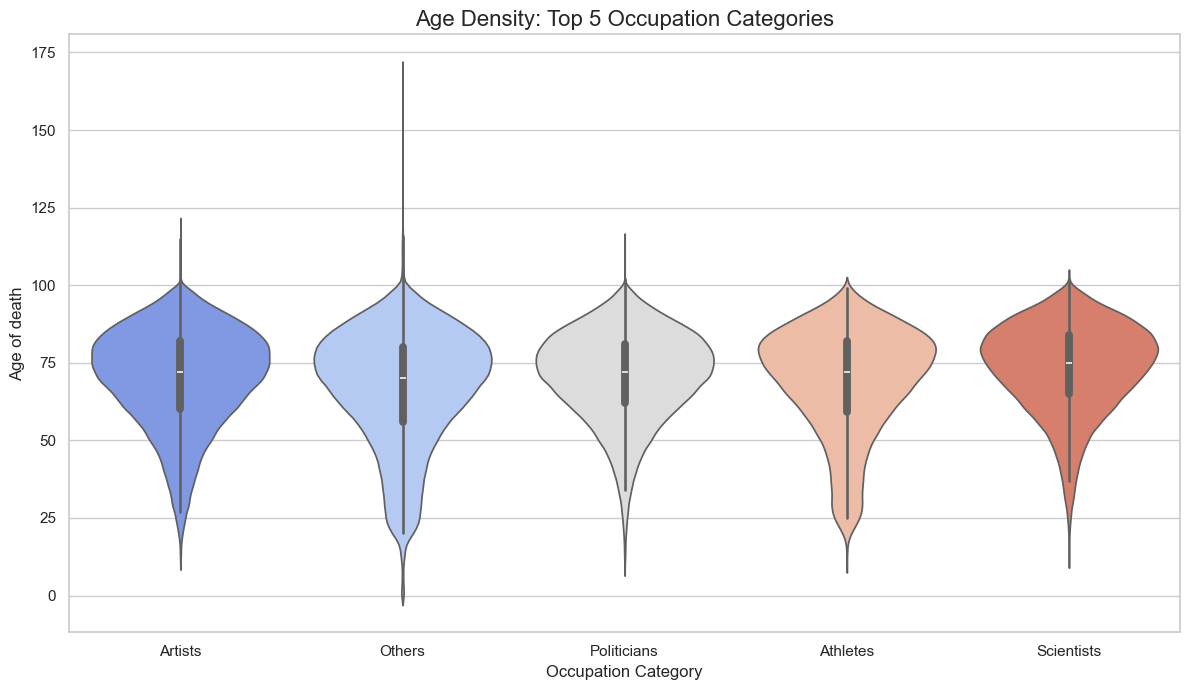

In [15]:
# 1. Top 10 Specific Occupations (Using Pandas Plot - no warning here)
plt.figure(figsize=(12, 6))
df['Occupation'].value_counts().head(10).sort_values().plot(kind='barh', color='salmon')
plt.title('Top 10 Most Common Specific Occupations', fontsize=16)
plt.xlabel('Count')
plt.tight_layout()
plt.savefig(f"{FIGURES_DIR}/03_top_10_occupations.png")
plt.show()

# 2. Age of Death by Occupation Category (Boxplot - FIXED)
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='Occupation Category', 
    y='Age of death', 
    data=df, 
    palette='Set3', 
    hue='Occupation Category', # Added hue to match x
    legend=False                # Removed redundant legend
)
plt.title('Lifespan Distribution by Occupation Category', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{FIGURES_DIR}/04_age_by_category_boxplot.png")
plt.show()

# 3. Age of Death vs Top 5 Occupation Categories (Violin Plot - FIXED)
top_5_cats = df['Occupation Category'].value_counts().head(5).index
df_top_5 = df[df['Occupation Category'].isin(top_5_cats)]

plt.figure(figsize=(12, 7))
sns.violinplot(
    x='Occupation Category', 
    y='Age of death', 
    data=df_top_5, 
    palette='coolwarm', 
    hue='Occupation Category', # Added hue to match x
    legend=False                # Removed redundant legend
)
plt.title('Age Density: Top 5 Occupation Categories', fontsize=16)
plt.tight_layout()
plt.savefig(f"{FIGURES_DIR}/05_age_vs_top5_cats.png")
plt.show()